In [6]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=3a4d100e4bf527d787b2a3460f7daaa7a47f4667cc951597568a2f67be05612e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

In [8]:
# Fetch historical data for a stock (e.g., Apple Inc.)
data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
data = data.dropna()
# Display the first few rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200


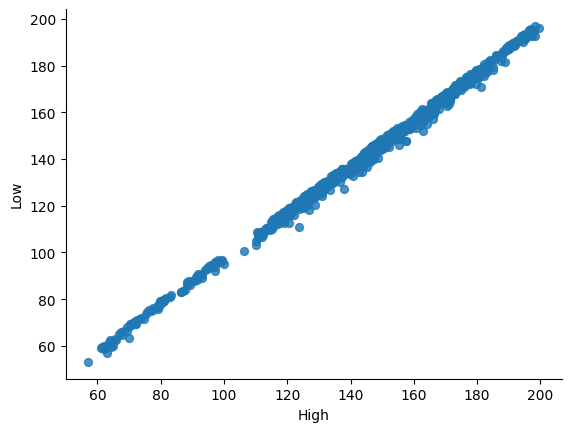

In [14]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# Calculate moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()

# Calculate RSI
rsi = RSIIndicator(data['Close'], window=14)
data['RSI'] = rsi.rsi()

# Calculate MACD
macd = MACD(data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()
data['MACD_Diff'] = macd.macd_diff()

# Calculate Bollinger Bands
bollinger = BollingerBands(data['Close'], window=20, window_dev=2)
data['Bollinger_High'] = bollinger.bollinger_hband()
data['Bollinger_Low'] = bollinger.bollinger_lband()

# Drop NaN values
data = data.dropna()

# Display the first few rows of the data with new features
data.head()


,Open,High,Low,Close,Adj Close,Volume,20_MA,50_MA,RSI,MACD,MACD_Signal,MACD_Diff,Bollinger_High,Bollinger_Low
Date,,,,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,45.208796,-2.760997,-2.125462,-0.635534,83.202509,63.114240
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976841,322423600,72.124124,76.16100,36.826389,-3.339646,-2.368299,-0.971347,82.863448,61.384800
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570061,324056000,71.297374,75.93815,40.372320,-3.542553,-2.603150,-0.939403,82.106755,60.487993
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,39.002044,-3.784601,-2.839440,-0.945161,80.976341,59.694657
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602619,271857200,69.391499,75.40445,38.571570,-3.968803,-3.065313,-0.903491,79.754952,59.028046


In [10]:
# Define the strategy
data['Signal'] = 0
data['Signal'] = np.where(
    (data['20_MA'] > data['50_MA']) &
    (data['RSI'] < 70) &
    (data['MACD'] > data['MACD_Signal']),
    1,
    np.where(
        (data['20_MA'] < data['50_MA']) &
        (data['RSI'] > 30) &
        (data['MACD'] < data['MACD_Signal']),
        -1,
        0
    )
)

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']



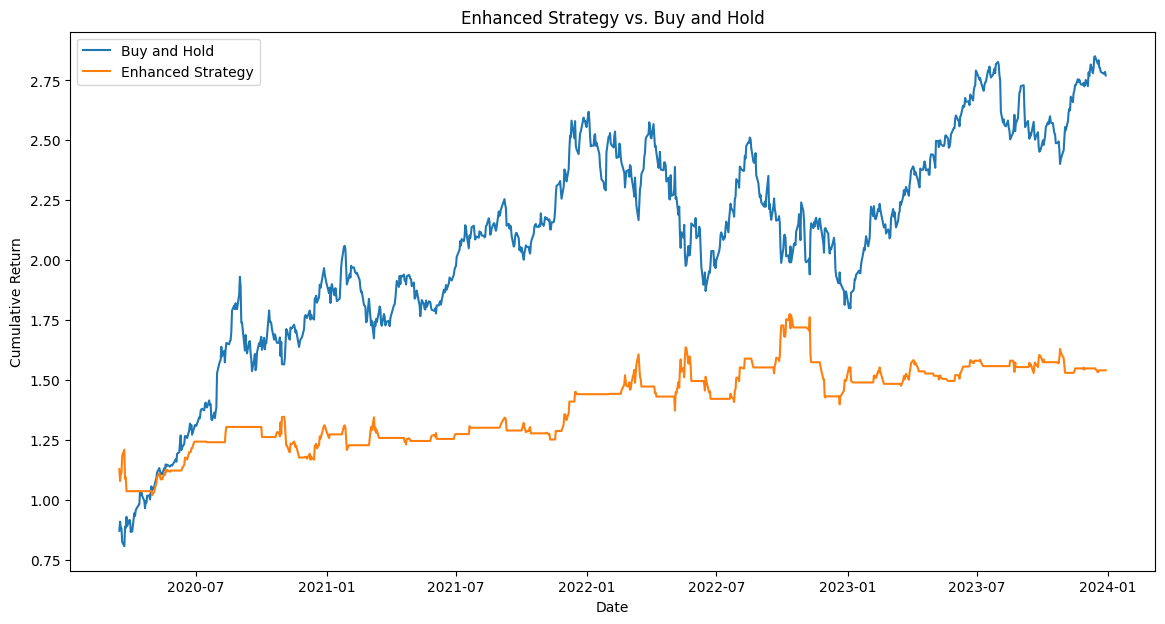

In [11]:
# Calculate cumulative returns
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Return'], label='Buy and Hold')
plt.plot(data['Cumulative_Strategy_Return'], label='Enhanced Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Enhanced Strategy vs. Buy and Hold')
plt.legend()
plt.show()
